**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the Dataset**

In [2]:
data=pd.read_csv('/content/Exam_Practice_Time_Optimization.csv')

In [3]:
data

,Student Name,Topic,Practice Duration (Minutes),Performance Score
0,Sneha,Statistics,103,40.088693
1,Pooja,Statistics,118,51.048677
2,Rahul,Calculus,52,35.125157
3,Arjun,Statistics,18,16.783582
4,Diya,Calculus,117,16.255738
...,...,...,...,...
995,Ishaan,Statistics,107,87.221530
996,Mira,Algebra,115,48.076296
997,Varun,Algebra,15,44.622285
998,Aniket,Algebra,17,27.974196


In [4]:
# Display the first few rows
data.head()

,Student Name,Topic,Practice Duration (Minutes),Performance Score
0,Sneha,Statistics,103,40.088693
1,Pooja,Statistics,118,51.048677
2,Rahul,Calculus,52,35.125157
3,Arjun,Statistics,18,16.783582
4,Diya,Calculus,117,16.255738


**Exploring the Dataset**

In [5]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student Name                 1000 non-null   object 
 1   Topic                        1000 non-null   object 
 2   Practice Duration (Minutes)  1000 non-null   int64  
 3   Performance Score            1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [6]:
# Summary statistics
data.describe()

,Practice Duration (Minutes),Performance Score
count,1000.000000,1000.000000
mean,65.829000,49.993665
std,32.365248,28.781621
min,10.000000,0.010477
25%,40.000000,25.870802
50%,64.500000,50.667373
75%,94.000000,74.832266
max,120.000000,99.855712


In [7]:
data['Topic'].value_counts()

,count
Topic,
Trigonometry,177
Geometry,172
Algebra,172
Calculus,166
Statistics,164
Probability,149


In [8]:
data.isnull().sum()

,0
Student Name,0
Topic,0
Practice Duration (Minutes),0
Performance Score,0


**Visualizing Practice Durations per Topic**

<ipython-input-14-904a247aa5ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Topic", y="Practice Duration (Minutes)", data=data, palette="Set3")


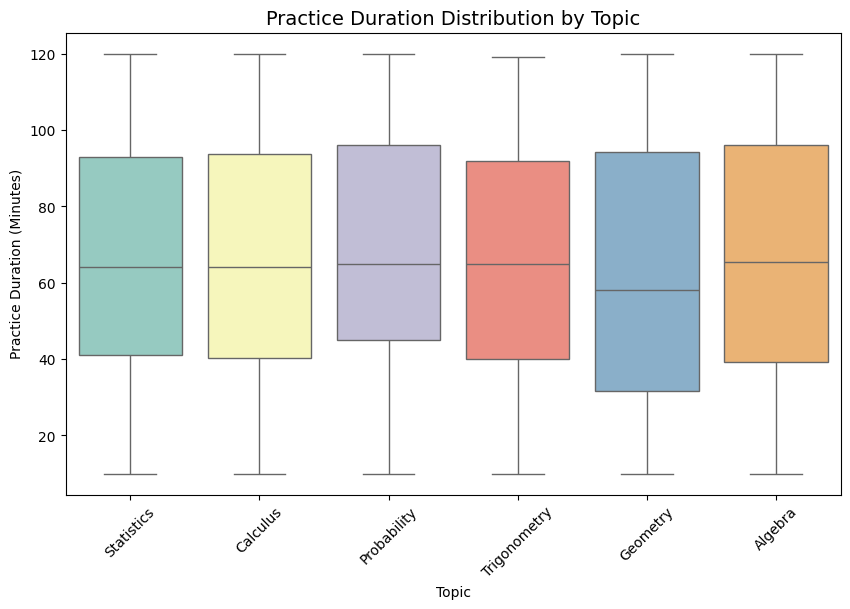

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Topic", y="Practice Duration (Minutes)", data=data, palette="Set3")
plt.title("Practice Duration Distribution by Topic", fontsize=14)
plt.xlabel("Topic")
plt.ylabel("Practice Duration (Minutes)")
plt.xticks(rotation=45)
plt.show()


- The boxplots show the practice duration (in minutes) for six topics: Statistics, Calculus, Probability, Trigonometry, Geometry, and Algebra.
- The median practice duration for all topics appears consistent, ranging around 60-70 minutes, while the interquartile range (IQR) varies slightly.
- All topics have a similar range (10 to 120 minutes), but outliers or differences in whisker lengths are not prominent.


**Correlation Between Practice Duration and Performance Score**

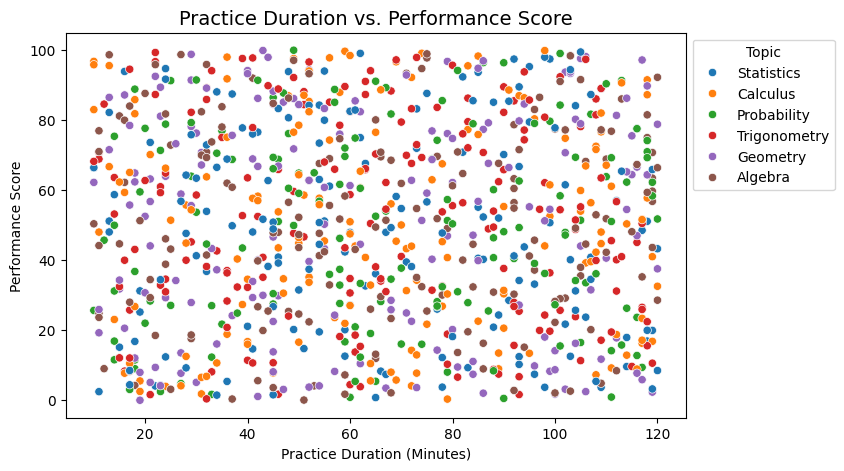

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Practice Duration (Minutes)", y="Performance Score", hue="Topic", data=data)
plt.title("Practice Duration vs. Performance Score", fontsize=14)
plt.xlabel("Practice Duration (Minutes)")
plt.ylabel("Performance Score")
plt.legend(title="Topic", bbox_to_anchor=(1, 1))
plt.show()


- This scatter plot shows the relationship between practice duration (x-axis) and performance scores (y-axis) for six topics.
- Performance scores are widely scattered across all practice durations, indicating no clear linear relationship.
- Points for different topics are evenly distributed, suggesting that topic type does not strongly influence the score-duration relationship.


**Grouping Data by Topics**

In [11]:
# Group data by topic
topic_summary = data.groupby("Topic")[["Practice Duration (Minutes)", "Performance Score"]].mean()

# Display the summary
topic_summary


,Practice Duration (Minutes),Performance Score
Topic,,
Algebra,66.174419,49.972887
Calculus,66.114458,49.761757
Geometry,63.273256,51.017441
Probability,67.550336,48.889950
Statistics,66.243902,48.265271
Trigonometry,65.875706,51.767062


**Recommending Optimal Practice Durations**

In [12]:
# Recommend optimal practice durations
optimal_durations = data.groupby("Topic")["Practice Duration (Minutes)"].median()

# Display recommendations
print(optimal_durations)


Topic
Algebra         65.5
Calculus        64.0
Geometry        58.0
Probability     65.0
Statistics      64.0
Trigonometry    65.0
Name: Practice Duration (Minutes), dtype: float64


**Visualizing Recommendations**

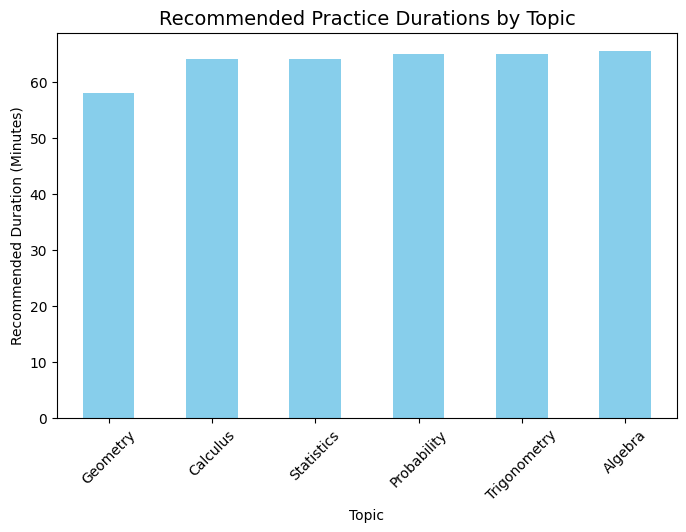

In [13]:
plt.figure(figsize=(8, 5))
optimal_durations.sort_values().plot(kind="bar", color="skyblue")
plt.title("Recommended Practice Durations by Topic", fontsize=14)
plt.xlabel("Topic")
plt.ylabel("Recommended Duration (Minutes)")
plt.xticks(rotation=45)
plt.show()


**Distribution of Practice Durations**

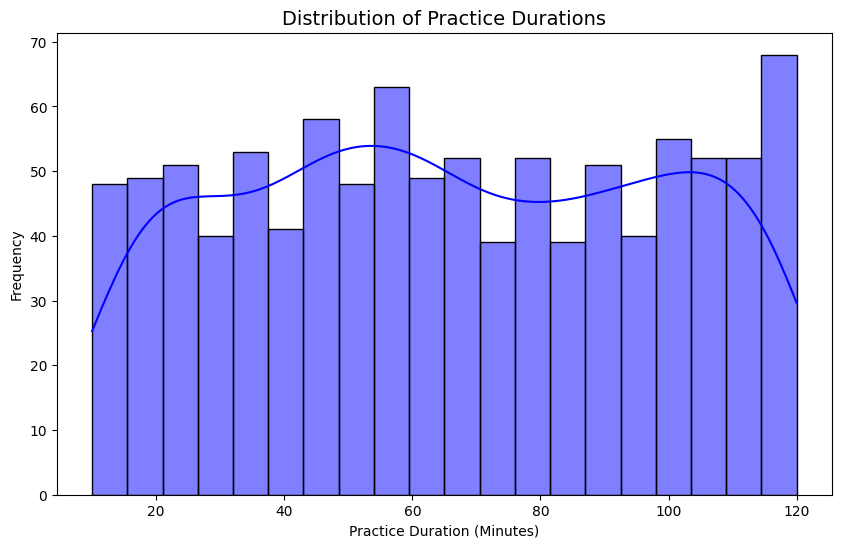

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Practice Duration (Minutes)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Practice Durations", fontsize=14)
plt.xlabel("Practice Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()


- The histogram displays the frequency of practice durations, with durations spread fairly evenly across intervals.
- The distribution appears bimodal, with peaks around 20-30 minutes and 110-120 minutes, suggesting two common ranges for practice times.
- The KDE line highlights a slight dip in the middle range (60-90 minutes), showing lower practice duration frequencies there.


**Performance Score by Student**

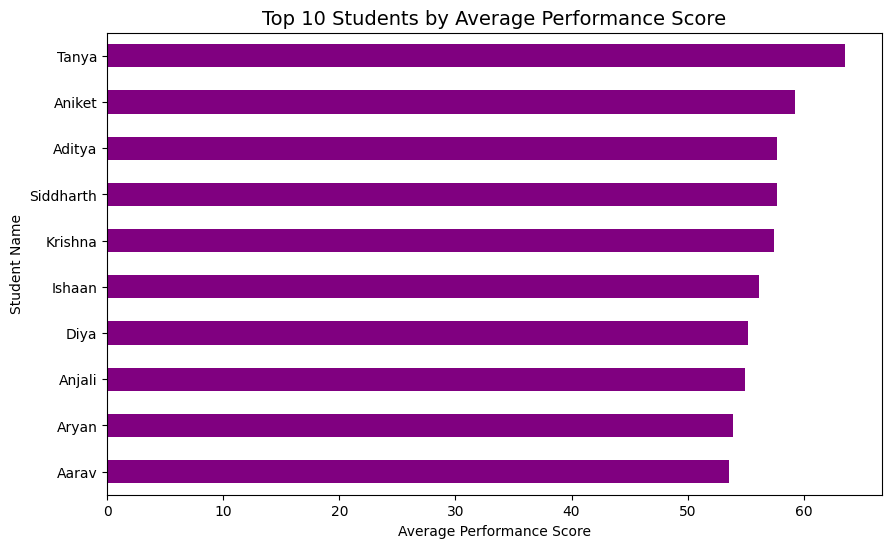

In [17]:
top_students = data.groupby("Student Name")["Performance Score"].mean().nlargest(10)

plt.figure(figsize=(10, 6))
top_students.sort_values().plot(kind="barh", color="purple")
plt.title("Top 10 Students by Average Performance Score", fontsize=14)
plt.xlabel("Average Performance Score")
plt.ylabel("Student Name")
plt.show()


**Performance Score Distribution Across Topics**

<ipython-input-19-19457563730f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Topic", y="Performance Score", data=data, palette="coolwarm")


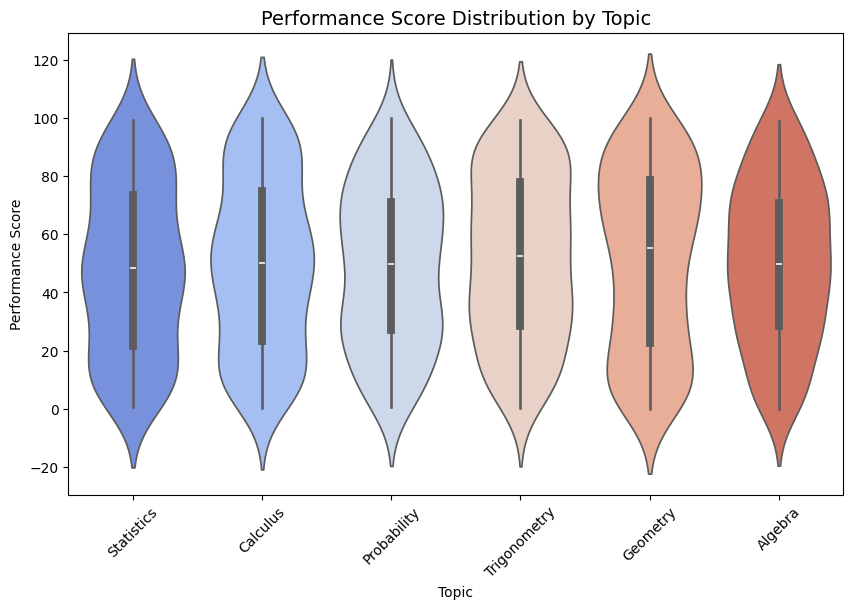

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Topic", y="Performance Score", data=data, palette="coolwarm")
plt.title("Performance Score Distribution by Topic", fontsize=14)
plt.xlabel("Topic")
plt.ylabel("Performance Score")
plt.xticks(rotation=45)
plt.show()


**Heatmap of Correlations**

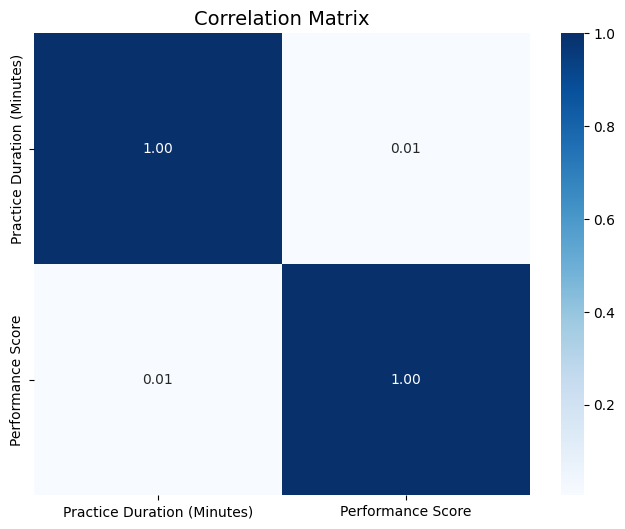

In [21]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[["Practice Duration (Minutes)", "Performance Score"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Correlation Matrix", fontsize=14)
plt.show()


features are not highly correlated

**Practice Duration and Performance Across Topics**

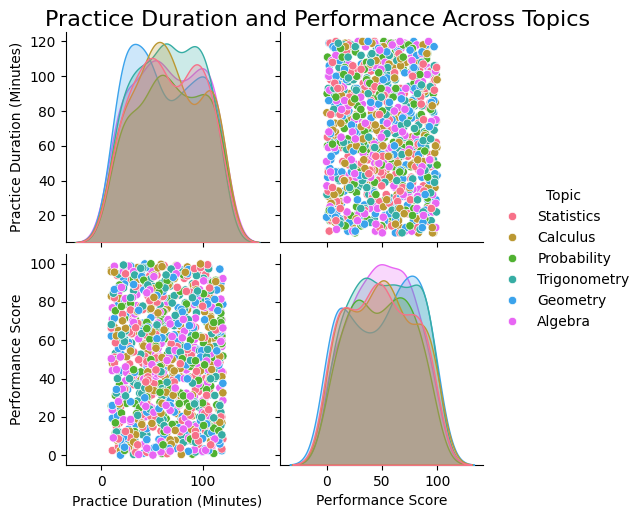

In [23]:
sns.pairplot(data, hue="Topic", vars=["Practice Duration (Minutes)", "Performance Score"], palette="husl", diag_kind="kde")
plt.suptitle("Practice Duration and Performance Across Topics", y=1.02, fontsize=16)
plt.show()


**Bar Plot of Average Performance Score by Topic**

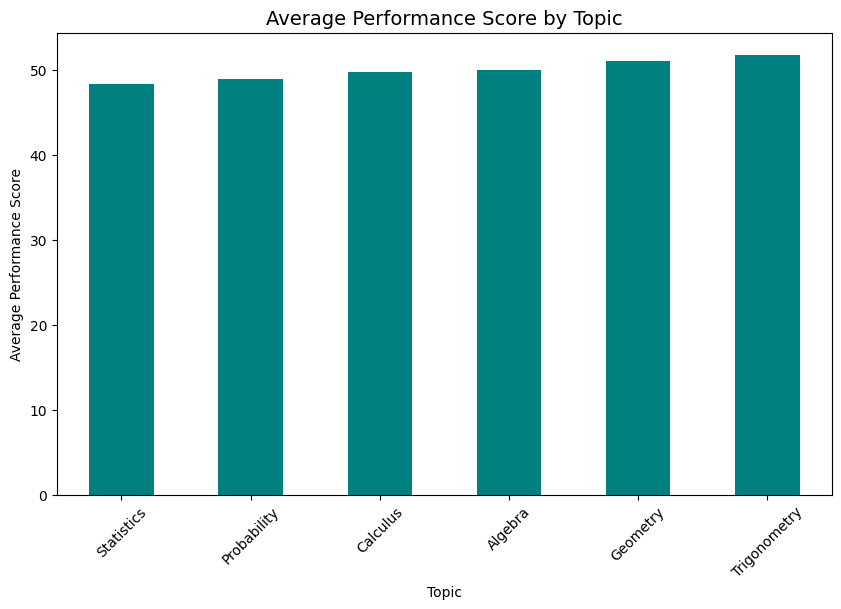

In [25]:
avg_scores_by_topic = data.groupby("Topic")["Performance Score"].mean()

plt.figure(figsize=(10, 6))
avg_scores_by_topic.sort_values().plot(kind="bar", color="teal")
plt.title("Average Performance Score by Topic", fontsize=14)
plt.xlabel("Topic")
plt.ylabel("Average Performance Score")
plt.xticks(rotation=45)
plt.show()


**Practice Duration Trends Over Sessions**

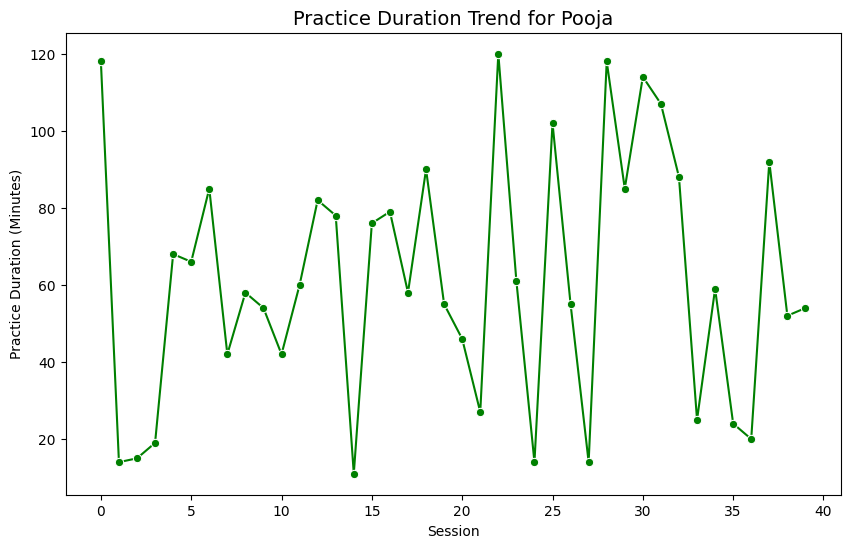

In [26]:
# Select a random student
random_student = data["Student Name"].sample(1).iloc[0]
student_data = data[data["Student Name"] == random_student]

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(student_data)), y=student_data["Practice Duration (Minutes)"], marker="o", color="green")
plt.title(f"Practice Duration Trend for {random_student}", fontsize=14)
plt.xlabel("Session")
plt.ylabel("Practice Duration (Minutes)")
plt.show()


**Boxplot of Practice Durations by Top 5 Students**

<ipython-input-28-82532dcc84c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Student Name", y="Practice Duration (Minutes)", data=filtered_data, palette="pastel")


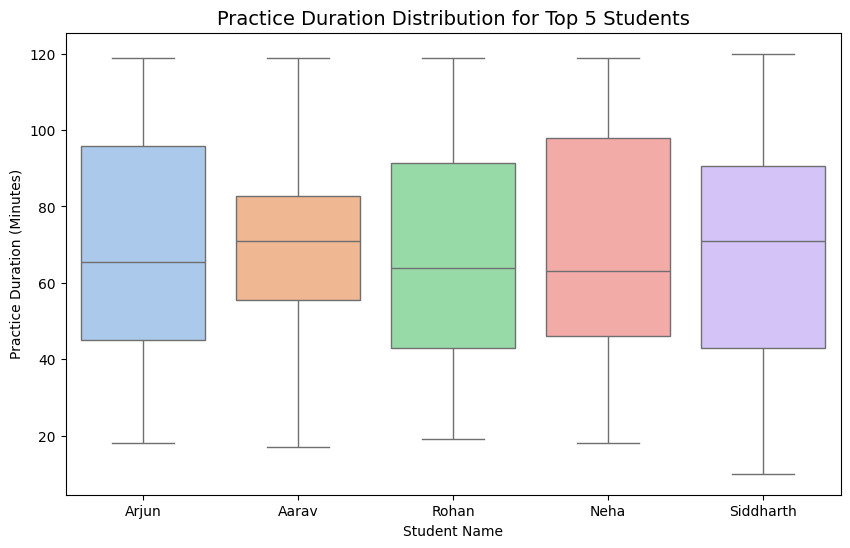

In [28]:
top_5_students = data.groupby("Student Name")["Practice Duration (Minutes)"].sum().nlargest(5).index
filtered_data = data[data["Student Name"].isin(top_5_students)]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Student Name", y="Practice Duration (Minutes)", data=filtered_data, palette="pastel")
plt.title("Practice Duration Distribution for Top 5 Students", fontsize=14)
plt.xlabel("Student Name")
plt.ylabel("Practice Duration (Minutes)")
plt.show()
